# Fidelity

### fidelity is a measure of the "closeness" of two quantum states

Reference:https://en.wikipedia.org/wiki/Fidelity_of_quantum_states

1. Process fidleity:

Return the process fidelity of a noisy quantum channel.

2. state fidelity:

Return the state fidelity between two quantum states.

3. average_gate_fidelity:

Return the average gate fidelity of a noisy quantum channel.

## process fidelity :
generally only a valid measure of closeness if the input operators are unitary 

Reference:
https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html

https://qiskit.org/documentation/stubs/qiskit.quantum_info.process_fidelity.html#qiskit.quantum_info.process_fidelity

In [94]:
from qiskit.quantum_info import *
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import XGate,ZGate,YGate,SGate
from qiskit.visualization import *
import numpy as np
from qiskit import QuantumCircuit,Aer,execute

### initialize the operator object with a matrix given as a list or a Numpy array

In [50]:
Operator([[0,1],[1,0]])

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [51]:
array_to_latex(Operator([[0,1],[1,0]]).data)

<IPython.core.display.Latex object>

### To check whether it is unitary

In [52]:
Operator([[0,1],[1,0]]).is_unitary()

True

### Create an Operator for a Gate object

In [53]:
Operator(XGate())

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [54]:
array_to_latex(Operator([[0,1],[1,0]]).data)

<IPython.core.display.Latex object>

In [55]:
Operator(XGate()).is_unitary()

True

### Let's use the process fidelity to verify whether both are unitary

In [56]:
process_fidelity(Operator([[0,1],[1,0]]),Operator(XGate()))

1.0

### Note:
In the case of unitary operators it does not depend on global phase.

In [57]:
# Two operators which differ only by phase
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

# Compute process fidelity
F = process_fidelity(op_a, op_b)
print('Process fidelity =', F)

Process fidelity = 1.0


## State fidelity :
Return the state fidelity between two quantum states.

Reference:
https://qiskit.org/documentation/stubs/qiskit.quantum_info.state_fidelity.html#qiskit.quantum_info.state_fidelity

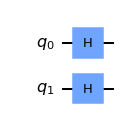

In [58]:
qc=QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.draw(output="mpl")

In [59]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc,backend,shots=1024)
result=job.result()
sv_1=result.get_statevector()
sv_1.draw(output="latex")

<IPython.core.display.Latex object>

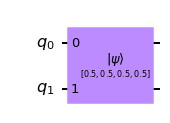

In [60]:
qc = QuantumCircuit(2)
qc.initialize([1/2, 1/2,1/2,1/2], [0,1])
qc.draw(output="mpl")

In [61]:
backend=Aer.get_backend('statevector_simulator')
job=execute(qc,backend,shots=1024)
result=job.result()
sv_2=result.get_statevector()
sv_2.draw(output="latex")

<IPython.core.display.Latex object>

In [62]:
state_fidelity(sv_1,sv_2)

1.0

## Average gate fidelity :

Reference:
https://qiskit.org/documentation/stubs/qiskit.quantum_info.average_gate_fidelity.html#qiskit.quantum_info.average_gate_fidelity

In [63]:
X_gate1=Operator(XGate())
X_gate2= Operator(Pauli(label='X'))



In [64]:
average_gate_fidelity(X_gate1,X_gate2)

1.0

In [65]:
# Two operators which differ only by phase

In [66]:
X_gate1=Operator(XGate())
X_gate2= np.exp(1j * 0.5)*Operator(XGate())

In [67]:
average_gate_fidelity(X_gate1,X_gate2)

1.0

In [109]:
# let's take another example
a=Operator(Pauli(label='Z'))
b=Operator(Pauli(label='Y'))

In [110]:
average_gate_fidelity(a,b)

0.3333333333333333

In [111]:
process_fidelity(a,b)

0.0

In [112]:
x=Operator(ZGate())
y=Operator(SGate())

In [113]:
average_gate_fidelity(x,y)

0.6666666666666666

In [114]:
process_fidelity(x,y)

0.5000000000000001

In [95]:
S_gate=Operator(SGate())
S_gate.is_unitary()

True